In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from  sklearn.preprocessing  import  StandardScaler 
%matplotlib inline
from sklearn.impute import SimpleImputer
from datetime import date

In [2]:
DF = pd.read_csv('use-of-force.csv',sep=',')
DW = pd.read_csv('use-of-force-DW.csv',sep=',')

In [3]:
DF.columns = [x.upper() for x in DF.columns]

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061 entries, 0 to 8060
Data columns (total 11 columns):
ID                   8061 non-null object
INCIDENT_NUM         8061 non-null int64
INCIDENT_TYPE        8061 non-null object
OCCURED_DATE_TIME    8061 non-null object
PRECINCT             7454 non-null object
SECTOR               8061 non-null object
BEAT                 7454 non-null object
OFFICER_ID           8061 non-null int64
SUBJECT_ID           8061 non-null int64
SUBJECT_RACE         6730 non-null object
SUBJECT_GENDER       7866 non-null object
dtypes: int64(3), object(8)
memory usage: 692.8+ KB


In [5]:
DF.head()

,ID,INCIDENT_NUM,INCIDENT_TYPE,OCCURED_DATE_TIME,PRECINCT,SECTOR,BEAT,OFFICER_ID,SUBJECT_ID,SUBJECT_RACE,SUBJECT_GENDER
0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,NaN,-,NaN,2238,14470,Black or African American,Female
1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,NaN,-,NaN,1589,12833,Black or African American,Male
2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,NaN,-,NaN,2017,12130,White,Male
3,29139-4759-15571,29139,Level 1 - Use of Force,2018-02-15T13:06:00,NaN,-,NaN,4759,15571,Black or African American,Male
4,30425-4745-16299,30425,Level 1 - Use of Force,2018-07-17T21:00:00,NaN,-,NaN,4745,16299,White,Female


# VERIFICAR COLUNAS NULAS

In [6]:
data = dict(DF.isnull().sum())
group_data = list(data.values())
group_names = list(data.keys())

<BarContainer object of 11 artists>

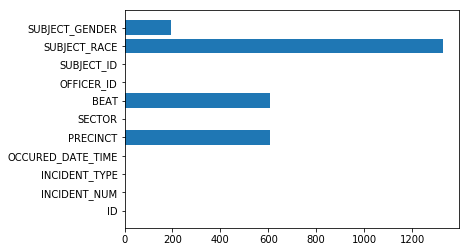

In [7]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

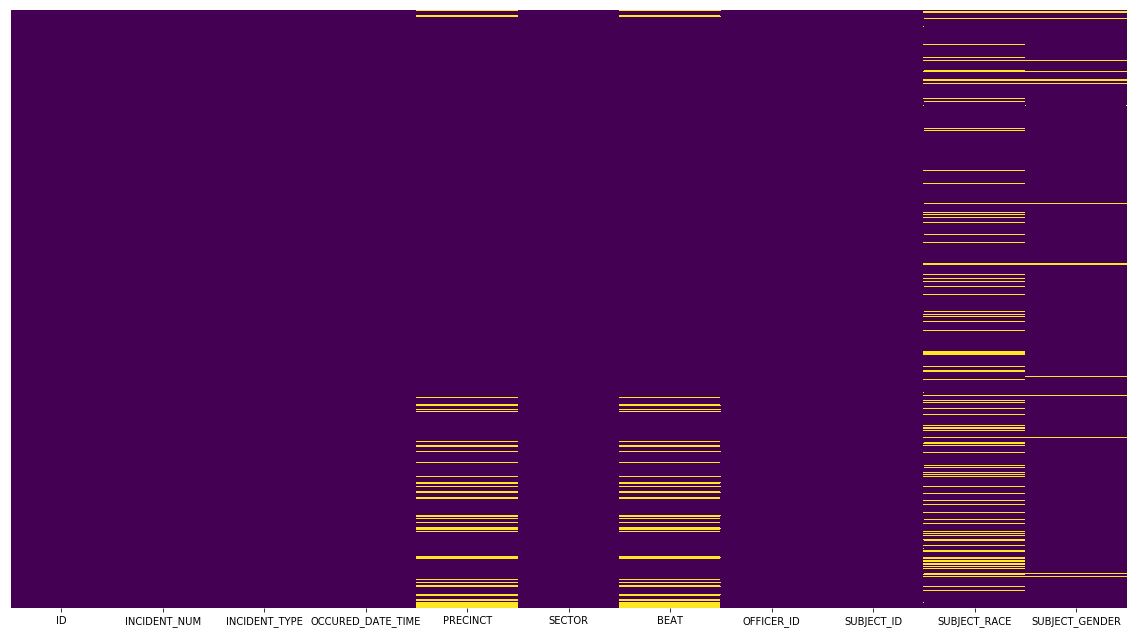

In [8]:
plt.figure(figsize=(20,11))
sns.heatmap(DF.isnull(),yticklabels=False,cbar=False,cmap='viridis')

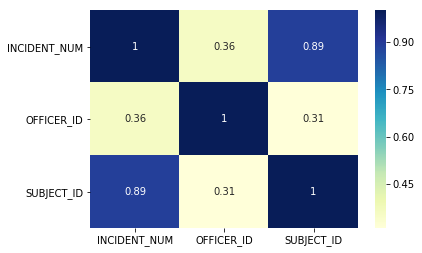

In [9]:
sns.heatmap(DF.corr(), annot=True , cmap="YlGnBu")

# IMPUTAÇÃO DE DADOS FALTANTES

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_moda = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [12]:
DF_IMPUTE= pd.DataFrame(imp_moda.fit_transform(DF[['SUBJECT_GENDER','SUBJECT_RACE','PRECINCT','BEAT']]))

In [13]:
DF_IMPUTE.head(1)

,0,1,2,3
0,Female,Black or African American,W,E2


In [14]:
DF_IMPUTE.columns = ['SUBJECT_GENDER','SUBJECT_RACE','PRECINCT','BEAT'] 

In [15]:
DF_IMPUTE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061 entries, 0 to 8060
Data columns (total 4 columns):
SUBJECT_GENDER    8061 non-null object
SUBJECT_RACE      8061 non-null object
PRECINCT          8061 non-null object
BEAT              8061 non-null object
dtypes: object(4)
memory usage: 252.0+ KB


In [16]:
del DF['SUBJECT_GENDER']
del DF['SUBJECT_RACE']
del DF['PRECINCT']
del DF['BEAT']

In [17]:
DF['SUBJECT_GENDER'] = DF_IMPUTE.SUBJECT_GENDER.values
DF['SUBJECT_RACE']   = DF_IMPUTE.SUBJECT_RACE.values
DF['PRECINCT']       = DF_IMPUTE.PRECINCT.values
DF['BEAT']           = DF_IMPUTE.BEAT.values

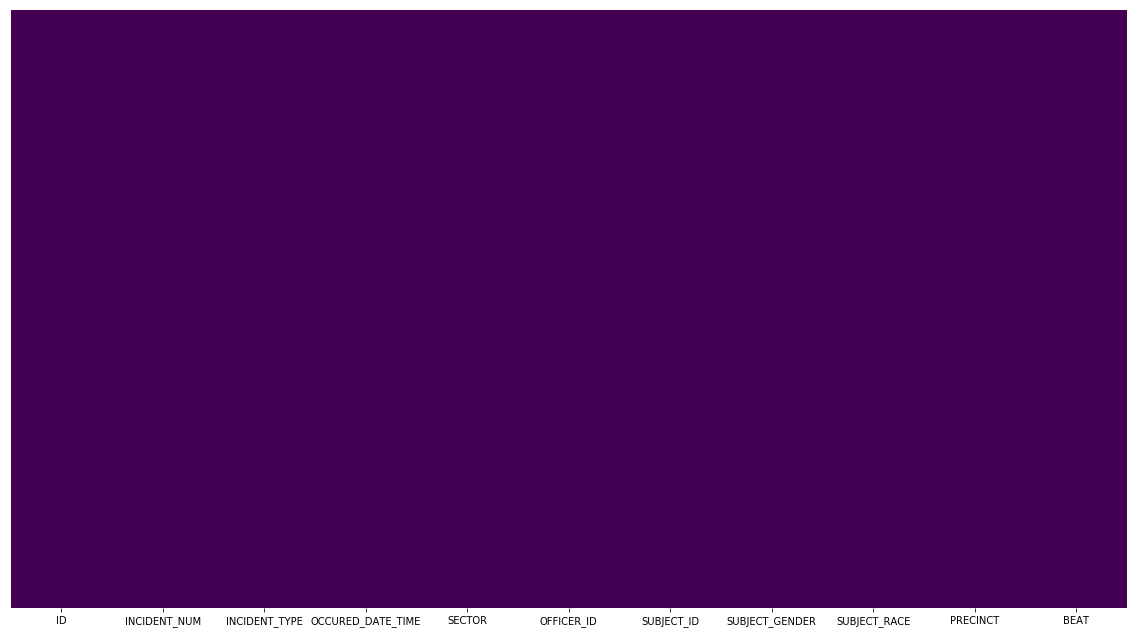

In [18]:
plt.figure(figsize=(20,11))
sns.heatmap(DF.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# MANIPULAÇÃO DO DATASET

In [19]:
DF.INCIDENT_TYPE.drop_duplicates()

0     Level 1 - Use of Force
19    Level 2 - Use of Force
Name: INCIDENT_TYPE, dtype: object

In [20]:
DF.SUBJECT_RACE.drop_duplicates()

0           Black or African American
2                               White
64                              Asian
65      American Indian/Alaska Native
98                 Hispanic or Latino
1049    Nat Hawaiian/Oth Pac Islander
Name: SUBJECT_RACE, dtype: object

In [21]:
DF.SECTOR.drop_duplicates()

0        -
17       E
18       C
19       K
21       M
47       S
49       Q
50       O
52       B
54       N
55       D
61       G
62       R
67       U
105      X
113      W
143      J
173      F
180      L
1033    99
Name: SECTOR, dtype: object

In [22]:
DF.PRECINCT.drop_duplicates()

0       W
17      E
47      S
52      N
105     X
113    SW
Name: PRECINCT, dtype: object

In [23]:
DF.SECTOR.drop_duplicates()

0        -
17       E
18       C
19       K
21       M
47       S
49       Q
50       O
52       B
54       N
55       D
61       G
62       R
67       U
105      X
113      W
143      J
173      F
180      L
1033    99
Name: SECTOR, dtype: object

In [24]:
DF.BEAT.drop_duplicates()

0       E2
17      E1
18      C2
19      K1
21      M2
23      K2
26      M1
44      M3
47      S3
49      Q2
50      O3
52      B1
54      N3
55      D1
57      C3
59      Q3
61      G3
62      R1
66      B3
67      U3
105     XX
110     N2
113     W1
118     S1
121     D2
123     G1
128     E3
132     D3
143     J1
149     G2
169     U1
172     K3
173     F1
175     F2
180     L2
187     R3
196     U2
198     F3
218     S2
220     C1
223     L3
249     L1
296     J3
333     J2
346     R2
355     W3
356     N1
409     B2
414     Q1
638     O1
670     W2
857     O2
1033    99
Name: BEAT, dtype: object

In [25]:
DF

,ID,INCIDENT_NUM,INCIDENT_TYPE,OCCURED_DATE_TIME,SECTOR,OFFICER_ID,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,PRECINCT,BEAT
0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,-,2238,14470,Female,Black or African American,W,E2
1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,-,1589,12833,Male,Black or African American,W,E2
2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,-,2017,12130,Male,White,W,E2
3,29139-4759-15571,29139,Level 1 - Use of Force,2018-02-15T13:06:00,-,4759,15571,Male,Black or African American,W,E2
4,30425-4745-16299,30425,Level 1 - Use of Force,2018-07-17T21:00:00,-,4745,16299,Female,White,W,E2
5,30638-2146-17272,30638,Level 1 - Use of Force,2018-07-21T18:58:00,-,2146,17272,Male,White,W,E2
6,18081-1852-14330,18081,Level 1 - Use of Force,2017-11-14T12:56:00,-,1852,14330,Female,White,W,E2
7,15097-704-12153,15097,Level 1 - Use of Force,2017-04-03T10:30:00,-,704,12153,Female,Black or African American,W,E2
8,14270-1578-11649,14270,Level 1 - Use of Force,2017-01-26T16:30:00,-,1578,11649,Male,White,W,E2
9,15097-704-11880,15097,Level 1 - Use of Force,2017-04-03T10:30:00,-,704,11880,Male,Black or African American,W,E2


In [26]:
#COMO NA BASE DE DADOS EXISTE UM PADRAO NO TIPO DE INCIDENTE, FICA FACIL ENCONTRAR O QUE PRECISO.
def split_incident_type(incident_type):
    return incident_type.split()[1] 

#https://docs.python.org/2/library/datetime.html#datetime.timedelta 
# (%U = All days in a new year preceding the first Sunday ) | (%W All days in a new year preceding the first Monday)
def returnNumberWeek(DAY, MONTH, YEAR):
    return date(year=int(YEAR), month=int(MONTH), day=int(DAY)).strftime("%W")


DF['INCIDENT_TYPE_LEVEL'] = DF['INCIDENT_TYPE'].apply(split_incident_type)

# TRANSFORMA A VARIAVEL SEXO/RACE QUALITATIVA NOMINAL EM UM QUANTITATIVA DISCRETO
DF['SUBJECT_GENDER_NUM'] = pd.factorize(DF.SUBJECT_GENDER, sort=True)[0] + 1 
DF['SUBJECT_RACE_NUM'] = pd.factorize(DF.SUBJECT_RACE, sort=True)[0] + 1 
DF['PRECINCT_NUM'] = pd.factorize(DF.PRECINCT, sort=True)[0] + 1 
DF['BEAT_NUM'] = pd.factorize(DF.BEAT, sort=True)[0] + 1 
DF['SECTOR_NUM'] = pd.factorize(DF.SECTOR, sort=True)[0] + 1 


DF[['DATE','TIME']] = DF['OCCURED_DATE_TIME'].str.split('T',n=1, expand=True)

DF[['YEAR','MONTH','DAY']] = DF['DATE'].str.split('-',n=2, expand=True)

DF['MONTH_YEAR'] = DF['MONTH']+ '/'+ DF['YEAR']

# DIAS DA SEMANA PELA DATA. 
DF['WEEK_NUM'] = DF.apply(lambda x: returnNumberWeek(x['DAY'],x['MONTH'],x['YEAR']),axis=1)

DF['WEEK_YEAR'] = DF['WEEK_NUM']+ '/'+ DF['YEAR']

In [27]:
DF

,ID,INCIDENT_NUM,INCIDENT_TYPE,OCCURED_DATE_TIME,SECTOR,OFFICER_ID,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,PRECINCT,...,BEAT_NUM,SECTOR_NUM,DATE,TIME,YEAR,MONTH,DAY,MONTH_YEAR,WEEK_NUM,WEEK_YEAR
0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,-,2238,14470,Female,Black or African American,W,...,12,1,2017-11-28,01:40:00,2017,11,28,11/2017,48,48/2017
1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,-,1589,12833,Male,Black or African American,W,...,12,1,2017-06-22,04:15:00,2017,06,22,06/2017,25,25/2017
2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,-,2017,12130,Male,White,W,...,12,1,2017-03-30,15:59:00,2017,03,30,03/2017,13,13/2017
3,29139-4759-15571,29139,Level 1 - Use of Force,2018-02-15T13:06:00,-,4759,15571,Male,Black or African American,W,...,12,1,2018-02-15,13:06:00,2018,02,15,02/2018,07,07/2018
4,30425-4745-16299,30425,Level 1 - Use of Force,2018-07-17T21:00:00,-,4745,16299,Female,White,W,...,12,1,2018-07-17,21:00:00,2018,07,17,07/2018,29,29/2018
5,30638-2146-17272,30638,Level 1 - Use of Force,2018-07-21T18:58:00,-,2146,17272,Male,White,W,...,12,1,2018-07-21,18:58:00,2018,07,21,07/2018,29,29/2018
6,18081-1852-14330,18081,Level 1 - Use of Force,2017-11-14T12:56:00,-,1852,14330,Female,White,W,...,12,1,2017-11-14,12:56:00,2017,11,14,11/2017,46,46/2017
7,15097-704-12153,15097,Level 1 - Use of Force,2017-04-03T10:30:00,-,704,12153,Female,Black or African American,W,...,12,1,2017-04-03,10:30:00,2017,04,03,04/2017,14,14/2017
8,14270-1578-11649,14270,Level 1 - Use of Force,2017-01-26T16:30:00,-,1578,11649,Male,White,W,...,12,1,2017-01-26,16:30:00,2017,01,26,01/2017,04,04/2017
9,15097-704-11880,15097,Level 1 - Use of Force,2017-04-03T10:30:00,-,704,11880,Male,Black or African American,W,...,12,1,2017-04-03,10:30:00,2017,04,03,04/2017,14,14/2017


In [28]:
DF.to_csv('use-of-force-DW.csv',sep=",")

# ANALISANDO

In [29]:
plt.figure(figsize=(18,5))
#sns.countplot(x='INCIDENT_TYPE_LEVEL', hue='SECTOR', data=DF)

<Figure size 1296x360 with 0 Axes>

<Figure size 1296x360 with 0 Axes>

In [30]:
plt.figure(figsize=(18, 8))
#sns.pairplot(BASE_CLASSIFICADOR_ELEITO_ML_ELEITO_OU_NAO[titulos_regiaoCandidato], hue="CODIGO_SIT_CAND_TOT")

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

In [31]:
plt.figure(figsize=(18, 8))
#sns.regplot(x="INCIDENT_TYPE_LEVEL", y="SECTOR_NUM", data=DF);

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

In [32]:
DW

,Unnamed: 0,ID,INCIDENT_NUM,INCIDENT_TYPE,OCCURED_DATE_TIME,SECTOR,OFFICER_ID,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,...,PRECINCT_NUM,BEAT_NUM,SECTOR_NUM,DATE,TIME,YEAR,MONTH,DAY,MONTH_YEAR,WEEK_NUM
0,0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,-,2238,14470,Female,Black or African American,...,5,12,1,2017-11-28,01:40:00,2017,11,28,11/2017,48
1,1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,-,1589,12833,Male,Black or African American,...,5,12,1,2017-06-22,04:15:00,2017,6,22,06/2017,25
2,2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,-,2017,12130,Male,White,...,5,12,1,2017-03-30,15:59:00,2017,3,30,03/2017,13
3,3,29139-4759-15571,29139,Level 1 - Use of Force,2018-02-15T13:06:00,-,4759,15571,Male,Black or African American,...,5,12,1,2018-02-15,13:06:00,2018,2,15,02/2018,7
4,4,30425-4745-16299,30425,Level 1 - Use of Force,2018-07-17T21:00:00,-,4745,16299,Female,White,...,5,12,1,2018-07-17,21:00:00,2018,7,17,07/2018,29
5,5,30638-2146-17272,30638,Level 1 - Use of Force,2018-07-21T18:58:00,-,2146,17272,Male,White,...,5,12,1,2018-07-21,18:58:00,2018,7,21,07/2018,29
6,6,18081-1852-14330,18081,Level 1 - Use of Force,2017-11-14T12:56:00,-,1852,14330,Female,White,...,5,12,1,2017-11-14,12:56:00,2017,11,14,11/2017,46
7,7,15097-704-12153,15097,Level 1 - Use of Force,2017-04-03T10:30:00,-,704,12153,Female,Black or African American,...,5,12,1,2017-04-03,10:30:00,2017,4,3,04/2017,14
8,8,14270-1578-11649,14270,Level 1 - Use of Force,2017-01-26T16:30:00,-,1578,11649,Male,White,...,5,12,1,2017-01-26,16:30:00,2017,1,26,01/2017,4
9,9,15097-704-11880,15097,Level 1 - Use of Force,2017-04-03T10:30:00,-,704,11880,Male,Black or African American,...,5,12,1,2017-04-03,10:30:00,2017,4,3,04/2017,14
